<a href="https://colab.research.google.com/github/Yasmic/DeepLearning/blob/main/PytorchLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
x=torch.randn(2,2,requires_grad=True)

In [ ]:
y=torch.mul(x,x)

In [ ]:
y

tensor([[0.2708, 0.0272],
        [0.8308, 0.9373]], grad_fn=<MulBackward0>)

In [ ]:
v=torch.randn(2,2)
y.backward(v)


In [ ]:
x

tensor([[-0.5204, -0.1651],
        [ 0.9115, -0.9681]], requires_grad=True)

In [ ]:
y

tensor([[0.2708, 0.0272],
        [0.8308, 0.9373]], grad_fn=<MulBackward0>)

In [ ]:
v

tensor([[-0.2975, -0.6416],
        [ 0.2258,  0.8465]])

In [ ]:
x.grad

tensor([[ 0.0121, -0.4298],
        [ 0.6376, -0.7926]])

In [ ]:
x

tensor([[-0.5204, -0.1651],
        [ 0.9115, -0.9681]], requires_grad=True)

In [ ]:
import torch

X=torch.tensor([1,5,6,8],dtype=torch.float32)
W=torch.tensor([1,1,1,1],dtype=torch.float32,requires_grad=True)
Y=torch.tensor([1,2,3,4],dtype=torch.float32)
lr=0.01
epochs=10
def forward(X):
  return W*X
  #def loss (Y,Yhat,X):
   # return ((Y-Yhat)**2).mean()

for epoch in range(epochs):
  Yhat=forward(X)
  l=((Y-Yhat)**2).mean()
  l.backward()
  with torch.no_grad():
    W-=lr*W.grad
  W.grad.zero_()
  print(W)




tensor([1.0000, 0.9250, 0.9100, 0.8400], requires_grad=True)
tensor([1.0000, 0.8594, 0.8362, 0.7312], requires_grad=True)
tensor([1.0000, 0.8020, 0.7757, 0.6572], requires_grad=True)
tensor([1.0000, 0.7517, 0.7261, 0.6069], requires_grad=True)
tensor([1.0000, 0.7077, 0.6854, 0.5727], requires_grad=True)
tensor([1.0000, 0.6693, 0.6520, 0.5494], requires_grad=True)
tensor([1.0000, 0.6356, 0.6246, 0.5336], requires_grad=True)
tensor([1.0000, 0.6062, 0.6022, 0.5229], requires_grad=True)
tensor([1.0000, 0.5804, 0.5838, 0.5155], requires_grad=True)
tensor([1.0000, 0.5578, 0.5687, 0.5106], requires_grad=True)


In [ ]:
weight=torch.ones(4,dtype=torch.float32,requires_grad=True)
#for epoch in range(epochs):
 # model_output
epochs=4
for epoch in range(epochs):
  print(weight)
  model_output=(weight*4).sum()
  print(model_output)
  model_output.backward()
  print(weight.grad)
  weight.grad.zero_()

tensor([1., 1., 1., 1.], requires_grad=True)
tensor(16., grad_fn=<SumBackward0>)
tensor([4., 4., 4., 4.])
tensor([1., 1., 1., 1.], requires_grad=True)
tensor(16., grad_fn=<SumBackward0>)
tensor([4., 4., 4., 4.])
tensor([1., 1., 1., 1.], requires_grad=True)
tensor(16., grad_fn=<SumBackward0>)
tensor([4., 4., 4., 4.])
tensor([1., 1., 1., 1.], requires_grad=True)
tensor(16., grad_fn=<SumBackward0>)
tensor([4., 4., 4., 4.])


In [ ]:
A=torch.tensor([1,1,1,1],dtype=torch.float32,requires_grad=True)

print(A.requires_grad_(False))
B=torch.tensor([1,1,1,1],dtype=torch.float32,requires_grad=True)
print(B.detach_())



tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])


In [ ]:
X=torch.zeros(200,1,dtype=torch.float32)
Y=torch.zeros(200,1,dtype=torch.float32)

for i in range(200):
  X[i,0]=i
  Y[i,0]=i*i

In [ ]:
Y[4,0]

tensor(16.)

In [ ]:
# 1) Design model (input, output, forward pass with different layers)
# 2) Construct loss and optimizer
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights

import torch
import torch.nn as nn

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples, watch the shape!

#X = torch.tensor([[1], [2], [3], [4],[5],[10],[12],[6],[7]], dtype=torch.float32)
#Y = torch.tensor([[2], [4], [9], [16],[25],[100],[144],[36],[49]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')
# 0) create a test sample
X_test = torch.tensor([13], dtype=torch.float32)

# 1) Design Model, the model has to implement the forward pass!
# Here we can use a built-in model from PyTorch
input_size = n_features
hidden_size1=32
hidden_size2=42
output_size = n_features

# we can call this model with samples X
#model = nn.Linear(input_size, output_size)


class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, hidden_size1)
        self.lin1 = nn.Linear(hidden_size1, hidden_size2)
        self.lin2 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
         x= self.lin(x)
         x = nn.functional.relu(x)
         x=self.lin1(x)
         x = nn.functional.relu(x)
         x=self.lin2(x)
         x = nn.functional.relu(x)
         return x 

model = LinearRegression(input_size, output_size)


print(f'Prediction before training: f(13) = {model(X_test).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.0001
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
       # [w, b] = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', ' loss = ', l)

print(f'Prediction after training: f(13) = {model(X_test).item():.3f}')

#samples: 200, #features: 1
Prediction before training: f(13) = 0.801
epoch  1 : w =   loss =  tensor(3.1576e+08, grad_fn=<MseLossBackward>)
epoch  11 : w =   loss =  tensor(3.1601e+08, grad_fn=<MseLossBackward>)
epoch  21 : w =   loss =  tensor(3.1601e+08, grad_fn=<MseLossBackward>)
epoch  31 : w =   loss =  tensor(3.1601e+08, grad_fn=<MseLossBackward>)
epoch  41 : w =   loss =  tensor(3.1601e+08, grad_fn=<MseLossBackward>)
epoch  51 : w =   loss =  tensor(3.1601e+08, grad_fn=<MseLossBackward>)
epoch  61 : w =   loss =  tensor(3.1601e+08, grad_fn=<MseLossBackward>)
epoch  71 : w =   loss =  tensor(3.1601e+08, grad_fn=<MseLossBackward>)
epoch  81 : w =   loss =  tensor(3.1601e+08, grad_fn=<MseLossBackward>)
epoch  91 : w =   loss =  tensor(3.1601e+08, grad_fn=<MseLossBackward>)
Prediction after training: f(13) = 0.000


In [ ]:
X_test = torch.tensor([9], dtype=torch.float32)
print(f'Prediction after training: f(9) = {model(X_test).item():.3f}')

Prediction after training: f(9) = 83.967


In [ ]:
X.shape

torch.Size([9, 1])

In [ ]:
import torch
import torch.nn as nn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
x_numpy,y_numpy=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X=torch.from_numpy(x_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0],1)
n_samples,n_features=X.shape
input_size=n_features
output_size=1
learning_rate=0.01
model=nn.Linear(input_size,output_size)
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

num_epochs=100

for epoch in range(num_epochs):
  y_predicted=model(X)
  loss=criterion(y_predicted,y)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if(epoch+1)%10==0:
    print(f'epoch:{epoch+1},loss={loss.item():.4f}')

torch.Size([100, 1])
epoch:10,loss=4447.9360
epoch:20,loss=3317.5840
epoch:30,loss=2499.6135
epoch:40,loss=1907.0691
epoch:50,loss=1477.4044
epoch:60,loss=1165.5643
epoch:70,loss=939.0497
epoch:80,loss=774.3869
epoch:90,loss=654.6020
epoch:100,loss=567.4069


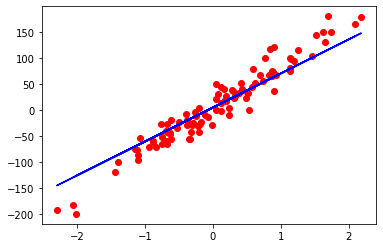

In [ ]:
predicted=model(X).detach().numpy()
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()

In [ ]:
import numpy as np
v=np.random.randint(0,4,(4,8))
v

array([[1, 1, 2, 0, 0, 2, 3, 0],
       [3, 3, 3, 2, 0, 1, 0, 2],
       [3, 3, 1, 1, 1, 2, 2, 0],
       [2, 2, 3, 2, 2, 3, 1, 3]])

In [ ]:
v1=v.T
v1

array([[1, 3, 3, 2],
       [1, 3, 3, 2],
       [2, 3, 1, 3],
       [0, 2, 1, 2],
       [0, 0, 1, 2],
       [2, 1, 2, 3],
       [3, 0, 2, 1],
       [0, 2, 0, 3]])

In [ ]:
m=np.matmul(v,v1)

In [ ]:
m

array([[19, 14, 18, 19],
       [14, 36, 25, 34],
       [18, 25, 29, 27],
       [19, 34, 27, 44]])

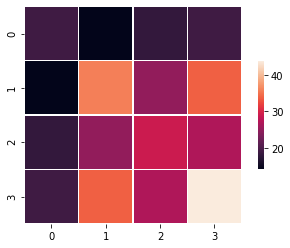

In [ ]:
import seaborn as sns
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(m,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
 r = np.corrcoef(v, v)

In [ ]:
r

array([[ 1.        , -0.17322276,  0.40370517, -0.22428065,  1.        ,
        -0.17322276,  0.40370517, -0.22428065],
       [-0.17322276,  1.        ,  0.23643312,  0.3940552 , -0.17322276,
         1.        ,  0.23643312,  0.3940552 ],
       [ 0.40370517,  0.23643312,  1.        , -0.42857143,  0.40370517,
         0.23643312,  1.        , -0.42857143],
       [-0.22428065,  0.3940552 , -0.42857143,  1.        , -0.22428065,
         0.3940552 , -0.42857143,  1.        ],
       [ 1.        , -0.17322276,  0.40370517, -0.22428065,  1.        ,
        -0.17322276,  0.40370517, -0.22428065],
       [-0.17322276,  1.        ,  0.23643312,  0.3940552 , -0.17322276,
         1.        ,  0.23643312,  0.3940552 ],
       [ 0.40370517,  0.23643312,  1.        , -0.42857143,  0.40370517,
         0.23643312,  1.        , -0.42857143],
       [-0.22428065,  0.3940552 , -0.42857143,  1.        , -0.22428065,
         0.3940552 , -0.42857143,  1.        ]])

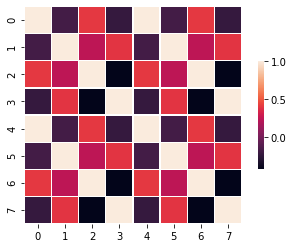

In [ ]:
sns.heatmap(r,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
import os
import torchvision
from torchvision import datasets
imagenet_data = torchvision.datasets.ImageNet('dog_images/train',download=True)

RuntimeError: ignored

In [ ]:
torchvision.__version__

'0.9.0+cu101'

In [5]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import TensorDataset

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

In [2]:
# Hyper parameters
num_epochs = 1
num_classes = 10
batch_size = 1
learning_rate = 0.001

# MNIST dataset
train_data = np.random.normal(size=(1, 1, 28, 28))
train_labels= np.random.normal(size=(1))
train_labels[train_labels>0.5]=1
train_labels[train_labels<=0.5]=0
train_data = torch.Tensor(train_data)
train_labels = torch.Tensor(train_labels)
train_labels = train_labels.type(torch.LongTensor)
train_dataset = TensorDataset( train_data, train_labels)
test_dataset = TensorDataset( train_data, train_labels)

# Data loader

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,

                                           batch_size=batch_size, 

                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,

                                          batch_size=batch_size, 

                                          shuffle=False)

In [3]:
class ConvNet(nn.Module):

    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.conv = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2)
        self.batch = nn.BatchNorm2d(16)
        self.relu = nn.ReLU()
        self.max=nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(16*14*14, num_classes)
     

    def forward(self, x):
        print(1,x.shape)
        out = self.conv(x)
        print(2,out.shape,(28-5+2*2)/1+1)
        out = self.batch(out)
        print(3,out.shape)
        out = self.relu(out)
        print(4,out.shape)
        out = self.max(out)
        print(5,out.shape)
        #out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        print(6,out.shape)
        out = self.fc(out)
        print(7,out.shape)
        return out



model = ConvNet(num_classes).to(device)

In [4]:
model

ConvNet(
  (conv): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (batch): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (max): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3136, out_features=10, bias=True)
)

In [7]:
images = train_loader.dataset.tensors[0]
with torch.no_grad():
  out = model(images)

1 torch.Size([1, 1, 28, 28])
2 torch.Size([1, 16, 28, 28]) 28.0
3 torch.Size([1, 16, 28, 28])
4 torch.Size([1, 16, 28, 28])
5 torch.Size([1, 16, 14, 14])
6 torch.Size([1, 3136])
7 torch.Size([1, 10])
